In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sympy as sym

from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

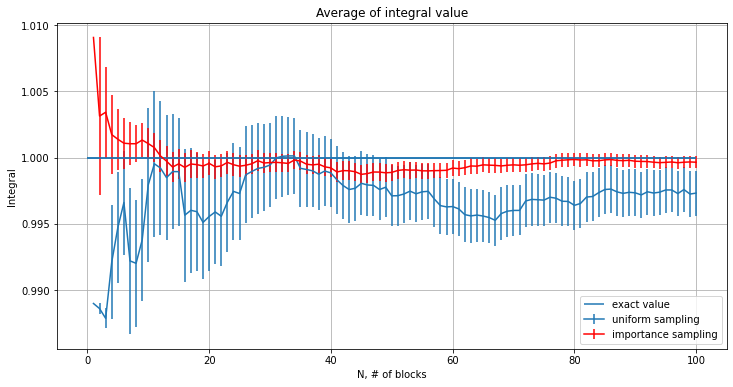

In [6]:
x1, y1, err1 = np.loadtxt("build/results02.1.uniform.dat", usecols=(0,1,2), unpack='true')
x2, y2, err2 = np.loadtxt("build/results02.1.reject.dat", usecols=(0,1,2), unpack='true')

plt.figure(figsize=(12, 6))
plt.title('Average of integral value')
plt.hlines(1, 0, 100, label='exact value')
plt.errorbar(x1,y1,yerr=err1, label="uniform sampling")
plt.errorbar(x2,y2,yerr=err2, color="red",label="importance sampling")
plt.hlines(1, 0, 100)
plt.xlabel('N, # of blocks')
plt.ylabel('Integral')
plt.grid(True)
plt.legend(loc='lower right',)
plt.show()